# EURO-CORDEX data from NC files

In [1]:
# import libraries
import os
from datetime import datetime, timezone
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import climag.plot_configs as cplt

In [2]:
print("Last updated:", datetime.now(tz=timezone.utc))

Last updated: 2022-09-22 13:24:17.007949+00:00


In [3]:
DATA_DIR_BASE = os.path.join("data", "eurocordex", "DMI")

In [4]:
# Cork Airport met station coords
LON = -8.48611
LAT = 51.84722

In [5]:
# Ireland boundary
GPKG_BOUNDARY = os.path.join("data", "boundary", "boundaries.gpkg")
ie = gpd.read_file(GPKG_BOUNDARY, layer="OS_IE_Ireland_ITM")

## tasmin

In [6]:
FILE_PATH = os.path.join(
    DATA_DIR_BASE,
    "historical",
    "mon",
    "tasmin_EUR-11_NCC-NorESM1-M_historical_r1i1p1_" +
    "DMI-HIRHAM5_v3_mon_200101-200512.nc"
)

In [7]:
data_ec = xr.open_dataset(FILE_PATH, decode_coords="all", chunks=True)

In [8]:
data_ec

<xarray.Dataset>
Dimensions:       (rlat: 412, rlon: 424, time: 60, bnds: 2)
Coordinates:
    lon           (rlat, rlon) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    lat           (rlat, rlon) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
  * time          (time) object 2001-01-16 12:00:00 ... 2005-12-16 12:00:00
  * rlat          (rlat) float64 -23.38 -23.26 -23.16 ... 21.61 21.73 21.83
  * rlon          (rlon) float64 -28.38 -28.26 -28.16 ... 17.93 18.05 18.16
    rotated_pole  |S1 ...
    time_bnds     (time, bnds) object dask.array<chunksize=(1, 1), meta=np.ndarray>
    height        float64 ...
Dimensions without coordinates: bnds
Data variables:
    tasmin        (time, rlat, rlon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
Attributes: (12/21)
    CDI:                            Climate Data Interface version 1.5.3 (htt...
    institution:                    Danish Meteorological Institute
    Conventions:                    CF-1.6
    contact:                        Fredrik Boberg, Danish Meteorological Ins...
    creation_date:                  2019-03-08 12:46:02
    experiment:                     Historical run using NorESM as driving model
    ...                             ...
    CORDEX_domain:                  EUR-11
    product:                        output
    CDO:                            Climate Data Operators version 1.5.3 (htt...
    frequency:                      mon
    tracking_id:                    d4f0092e-7c7d-11e9-b353-5f5d5c99c63d
    NCO:                            4.0.9

In [9]:
data_ec.rio.crs

CRS.from_wkt('GEOGCRS["undefined",BASEGEOGCRS["undefined",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ID["EPSG",6326]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]]],DERIVINGCONVERSION["Pole rotation (netCDF CF convention)",METHOD["Pole rotation (netCDF CF convention)"],PARAMETER["Grid north pole latitude (netCDF CF convention)",39.25,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],PARAMETER["Grid north pole longitude (netCDF CF convention)",-162,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],PARAMETER["North pole grid longitude (netCDF CF convention)",0,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]]],CS[ellipsoidal,2],AXIS["longitude",east,ORDER[1],ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],AXIS["latitude",north,ORDER[2],ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]]]')

In [10]:
# extract time series for Cork Airport
cds = cplt.rotated_pole_point(data_ec, lon=LON, lat=LAT)
data_ca = data_ec.sel({"rlon": cds[0], "rlat": cds[1]}, method="nearest")

In [11]:
data_ca

<xarray.Dataset>
Dimensions:       (time: 60, bnds: 2)
Coordinates:
    lon           float64 dask.array<chunksize=(), meta=np.ndarray>
    lat           float64 dask.array<chunksize=(), meta=np.ndarray>
  * time          (time) object 2001-01-16 12:00:00 ... 2005-12-16 12:00:00
    rlat          float64 4.015
    rlon          float64 -16.06
    rotated_pole  |S1 ...
    time_bnds     (time, bnds) object dask.array<chunksize=(1, 1), meta=np.ndarray>
    height        float64 ...
Dimensions without coordinates: bnds
Data variables:
    tasmin        (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes: (12/21)
    CDI:                            Climate Data Interface version 1.5.3 (htt...
    institution:                    Danish Meteorological Institute
    Conventions:                    CF-1.6
    contact:                        Fredrik Boberg, Danish Meteorological Ins...
    creation_date:                  2019-03-08 12:46:02
    experiment:                     Historical run using NorESM as driving model
    ...                             ...
    CORDEX_domain:                  EUR-11
    product:                        output
    CDO:                            Climate Data Operators version 1.5.3 (htt...
    frequency:                      mon
    tracking_id:                    d4f0092e-7c7d-11e9-b353-5f5d5c99c63d
    NCO:                            4.0.9

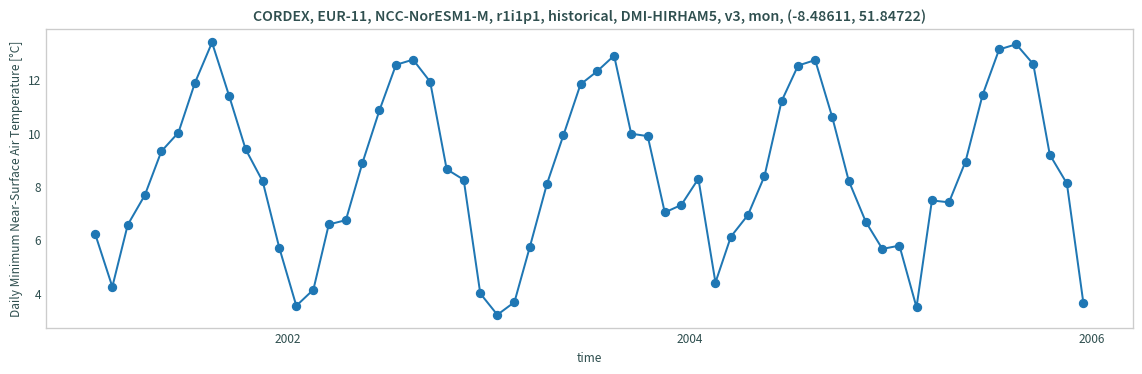

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(
    data_ca["time"], data_ca[list(data_ca.keys())[0]] - 273.15, marker="o"
)
plt.xlabel(data_ca["time"].attrs["standard_name"])
plt.ylabel(data_ca[list(data_ca.keys())[0]].attrs["long_name"] + " [°C]")
plt.title(cplt.cordex_plot_title(data_ca, lon=LON, lat=LAT))
plt.tight_layout()
plt.show()

In [13]:
# extract data for a given time
data_50 = data_ec.isel(time=50)

In [14]:
data_50

<xarray.Dataset>
Dimensions:       (rlat: 412, rlon: 424, bnds: 2)
Coordinates:
    lon           (rlat, rlon) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    lat           (rlat, rlon) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    time          object 2005-03-16 12:00:00
  * rlat          (rlat) float64 -23.38 -23.26 -23.16 ... 21.61 21.73 21.83
  * rlon          (rlon) float64 -28.38 -28.26 -28.16 ... 17.93 18.05 18.16
    rotated_pole  |S1 ...
    time_bnds     (bnds) object dask.array<chunksize=(1,), meta=np.ndarray>
    height        float64 ...
Dimensions without coordinates: bnds
Data variables:
    tasmin        (rlat, rlon) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
Attributes: (12/21)
    CDI:                            Climate Data Interface version 1.5.3 (htt...
    institution:                    Danish Meteorological Institute
    Conventions:                    CF-1.6
    contact:                        Fredrik Boberg, Danish Meteorological Ins...
    creation_date:                  2019-03-08 12:46:02
    experiment:                     Historical run using NorESM as driving model
    ...                             ...
    CORDEX_domain:                  EUR-11
    product:                        output
    CDO:                            Climate Data Operators version 1.5.3 (htt...
    frequency:                      mon
    tracking_id:                    d4f0092e-7c7d-11e9-b353-5f5d5c99c63d
    NCO:                            4.0.9

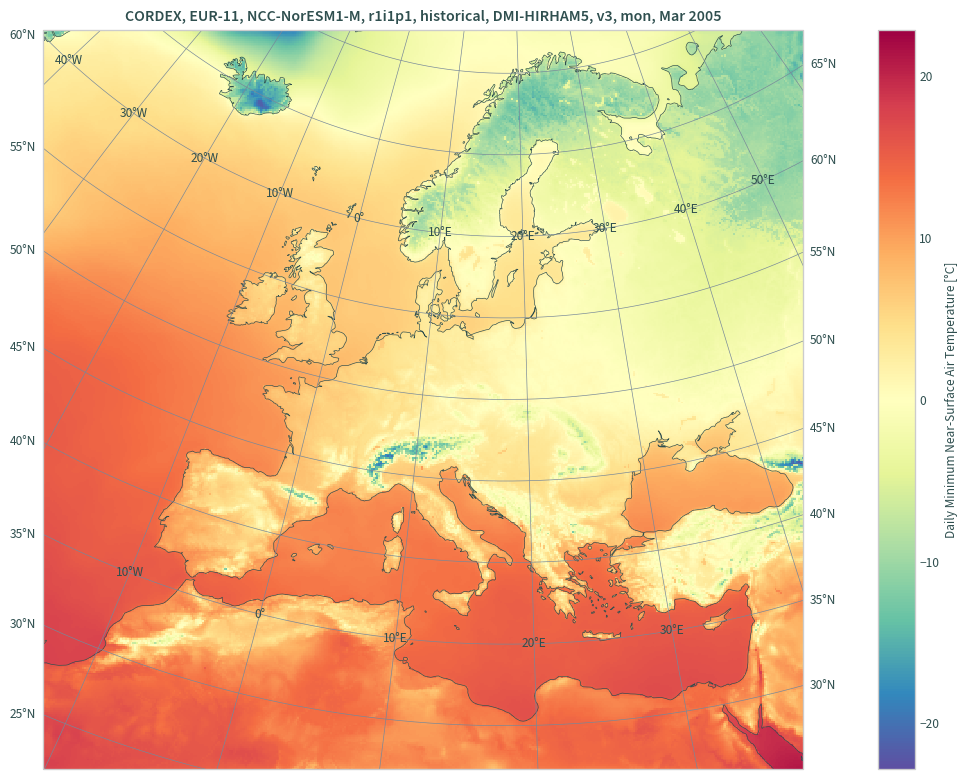

In [15]:
plot_transform = cplt.rotated_pole_transform(data_50)
data_var = data_50[list(data_50.keys())[0]]  # extract variable name
plot_data = data_var - 273.15  # convert to deg C
cbar_label = data_var.attrs["long_name"] + " [°C]"  # colorbar label

plt.figure(figsize=(20, 10))
ax = plt.axes(projection=plot_transform)

# specify gridline spacing and labels
ax.gridlines(
    draw_labels=True,
    xlocs=range(-180, 180, 10),
    ylocs=range(-90, 90, 5),
    color="lightslategrey",
    linewidth=.5
)

# plot data for the variable
plot_data.plot(
    ax=ax,
    cmap="Spectral_r",
    transform=plot_transform,
    x="rlon",
    y="rlat",
    cbar_kwargs=dict(label=cbar_label)
)

# add boundaries
ax.coastlines(resolution="50m", color="darkslategrey", linewidth=.5)

ax.set_title(cplt.cordex_plot_title(data_50))  # set plot title

plt.show()

In [15]:
# clip to Ireland's bounding box with a 10 km buffer
data_ie = data_50.rio.clip(ie.envelope.buffer(10000).to_crs(data_50.rio.crs))

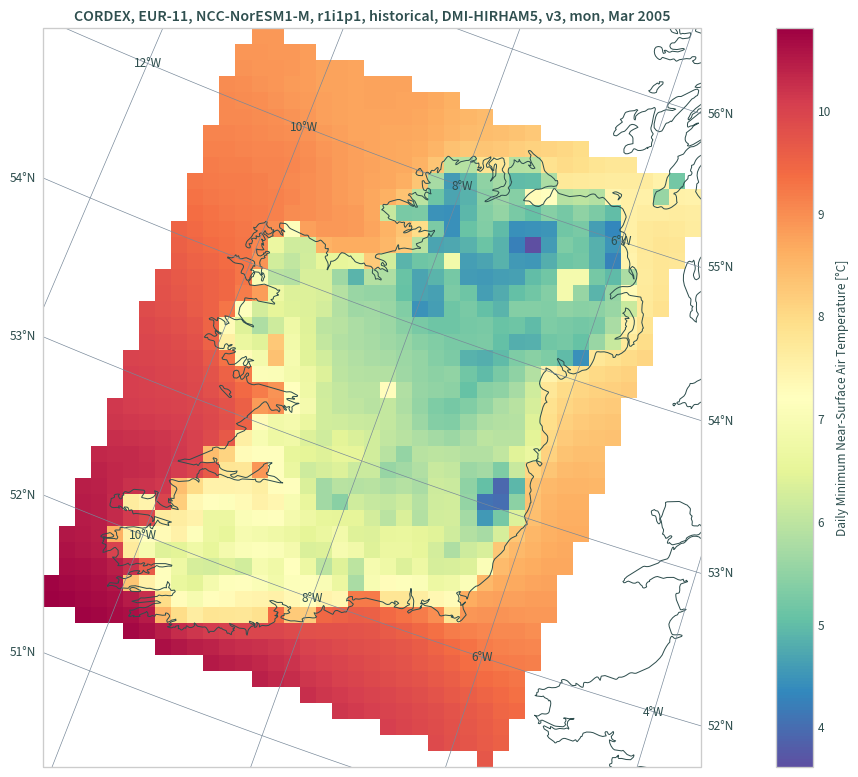

In [16]:
plot_transform = cplt.rotated_pole_transform(data_ie)
data_var = data_ie[list(data_ie.keys())[0]]  # extract variable name
plot_data = data_var - 273.15  # convert to deg C
cbar_label = data_var.attrs["long_name"] + " [°C]"  # colorbar label

plt.figure(figsize=(20, 10))
ax = plt.axes(projection=plot_transform)

# specify gridline spacing and labels
ax.gridlines(
    draw_labels=True,
    xlocs=range(-180, 180, 2),
    ylocs=range(-90, 90, 1),
    color="lightslategrey",
    linewidth=.5
)

# plot data for the variable
plot_data.plot(
    ax=ax,
    cmap="Spectral_r",
    transform=plot_transform,
    x="rlon",
    y="rlat",
    cbar_kwargs=dict(label=cbar_label)
)

# add boundaries
ax.coastlines(resolution="10m", color="darkslategrey", linewidth=.75)

# Cork Airport marker
# plt.scatter(cds[0], cds[1], s=100, c="darkslategrey", marker="*")

ax.set_title(cplt.cordex_plot_title(data_ie))  # set plot title

plt.show()

## tasmax

In [17]:
FILE_PATH = os.path.join(
    DATA_DIR_BASE,
    "historical",
    "mon",
    "tasmax_EUR-11_NCC-NorESM1-M_historical_r1i1p1_" +
    "DMI-HIRHAM5_v3_mon_200101-200512.nc"
)

data_ec = xr.open_dataset(FILE_PATH, decode_coords="all", chunks=True)

cds = cplt.rotated_pole_point(data_ec, lon=LON, lat=LAT)
data_ca = data_ec.sel({"rlon": cds[0], "rlat": cds[1]}, method="nearest")

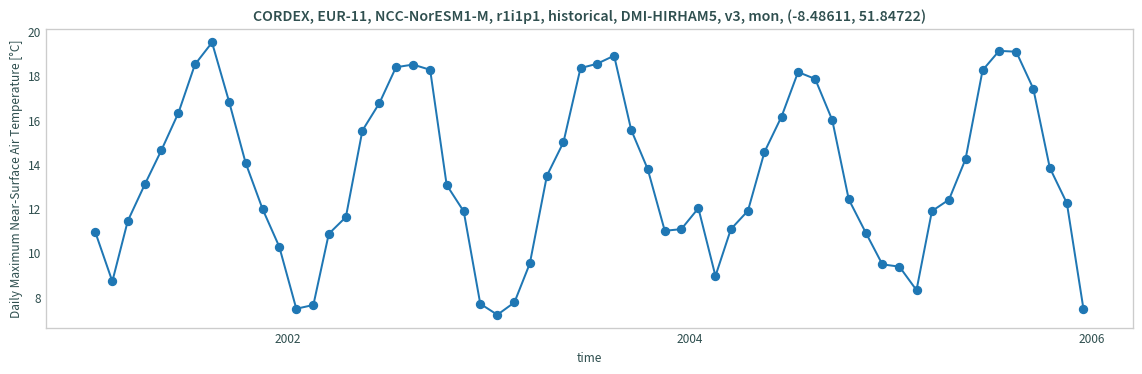

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(
    data_ca["time"], data_ca[list(data_ca.keys())[0]] - 273.15, marker="o"
)
plt.xlabel(data_ca["time"].attrs["standard_name"])
plt.ylabel(data_ca[list(data_ca.keys())[0]].attrs["long_name"] + " [°C]")
plt.title(cplt.cordex_plot_title(data_ca, lon=LON, lat=LAT))
plt.tight_layout()
plt.show()

In [18]:
data_50 = data_ec.isel(time=50)

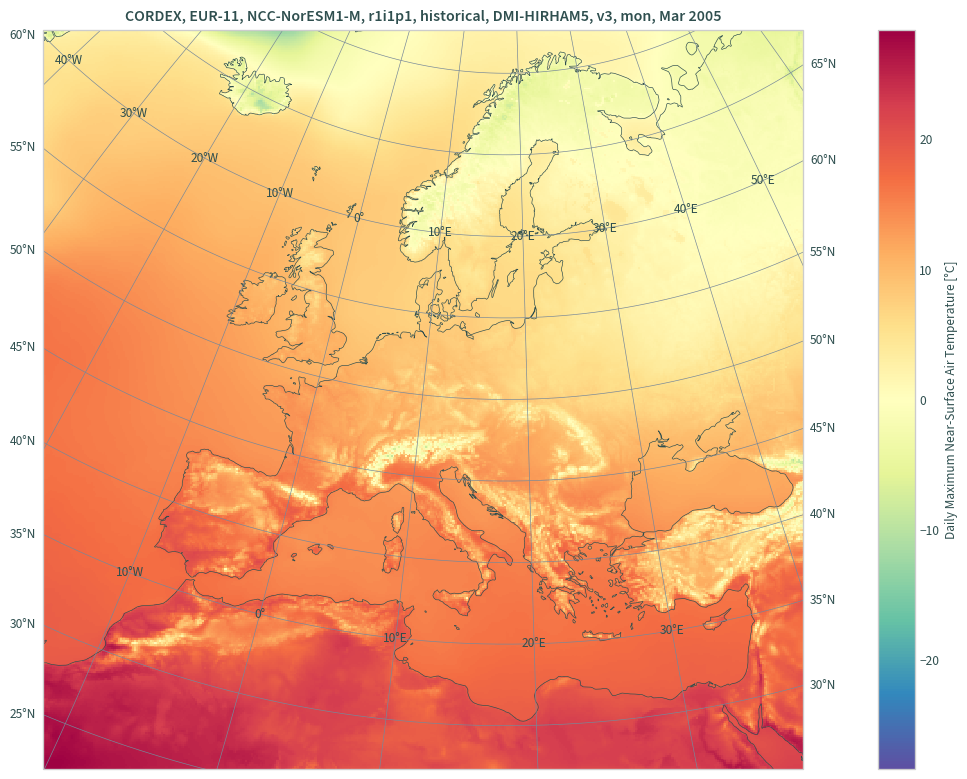

In [19]:
plot_transform = cplt.rotated_pole_transform(data_50)
data_var = data_50[list(data_50.keys())[0]]  # extract variable name
plot_data = data_var - 273.15  # convert to deg C
cbar_label = data_var.attrs["long_name"] + " [°C]"  # colorbar label

plt.figure(figsize=(20, 10))
ax = plt.axes(projection=plot_transform)

# specify gridline spacing and labels
ax.gridlines(
    draw_labels=True,
    xlocs=range(-180, 180, 10),
    ylocs=range(-90, 90, 5),
    color="lightslategrey",
    linewidth=.5
)

# plot data for the variable
plot_data.plot(
    ax=ax,
    cmap="Spectral_r",
    transform=plot_transform,
    x="rlon",
    y="rlat",
    cbar_kwargs=dict(label=cbar_label)
)

# add boundaries
ax.coastlines(resolution="50m", color="darkslategrey", linewidth=.5)

ax.set_title(cplt.cordex_plot_title(data_50))  # set plot title

plt.show()

In [20]:
data_ie = data_50.rio.clip(
    ie.envelope.buffer(10000).to_crs(data_50.rio.crs)
)

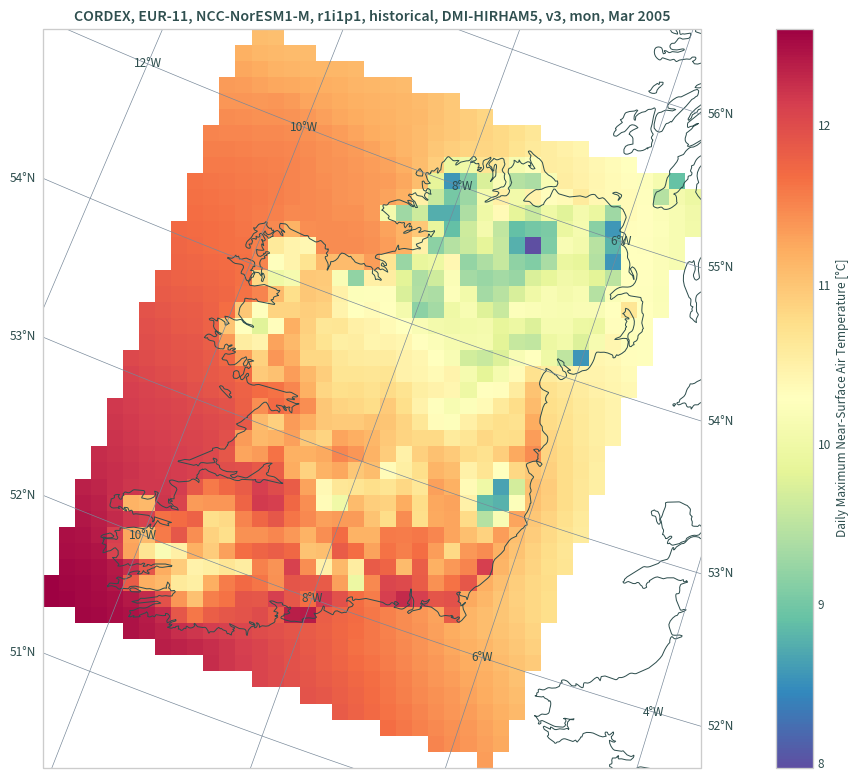

In [21]:
plot_transform = cplt.rotated_pole_transform(data_ie)
data_var = data_ie[list(data_ie.keys())[0]]  # extract variable name
plot_data = data_var - 273.15  # convert to deg C
cbar_label = data_var.attrs["long_name"] + " [°C]"  # colorbar label

plt.figure(figsize=(20, 10))
ax = plt.axes(projection=plot_transform)

# specify gridline spacing and labels
ax.gridlines(
    draw_labels=True,
    xlocs=range(-180, 180, 2),
    ylocs=range(-90, 90, 1),
    color="lightslategrey",
    linewidth=.5
)

# plot data for the variable
plot_data.plot(
    ax=ax,
    cmap="Spectral_r",
    transform=plot_transform,
    x="rlon",
    y="rlat",
    cbar_kwargs=dict(label=cbar_label)
)

# add boundaries
ax.coastlines(resolution="10m", color="darkslategrey", linewidth=.75)

# Cork Airport marker
# plt.scatter(cds[0], cds[1], s=100, c="darkslategrey", marker="*")

ax.set_title(cplt.cordex_plot_title(data_ie))  # set plot title

plt.show()

## pr

In [22]:
FILE_PATH = os.path.join(
    DATA_DIR_BASE,
    "rcp85",
    "mon",
    "pr_EUR-11_NCC-NorESM1-M_rcp85_r1i1p1_" +
    "DMI-HIRHAM5_v3_mon_204101-205012.nc"
)

data_ec = xr.open_dataset(FILE_PATH, decode_coords="all", chunks=True)

cds = cplt.rotated_pole_point(data_ec, lon=LON, lat=LAT)

In [23]:
data_ca = data_ec.sel({"rlon": cds[0], "rlat": cds[1]}, method="nearest")

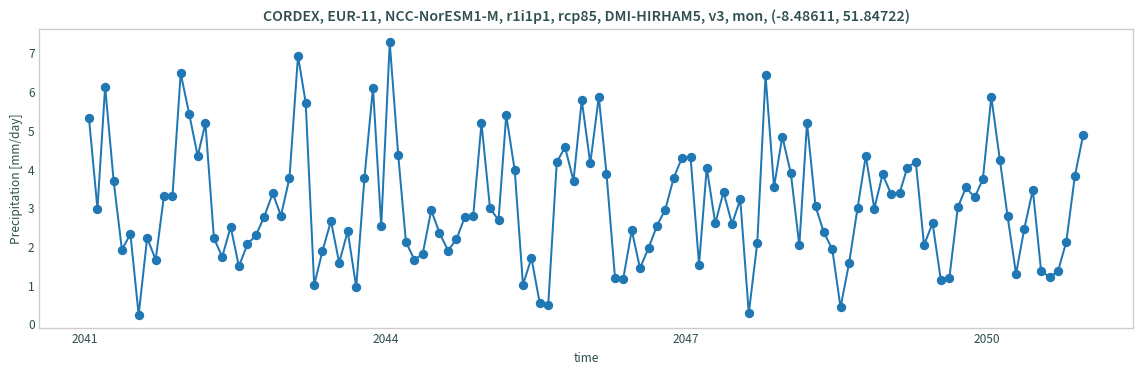

In [24]:
plt.figure(figsize=(12, 4))
plt.plot(
    data_ca["time"],
    data_ca[list(data_ca.keys())[0]] * 60 * 60 * 24,  # convert to mm/day
    marker="o"
)
plt.xlabel(data_ca["time"].attrs["standard_name"])
plt.ylabel(data_ca[list(data_ca.keys())[0]].attrs["long_name"] + " [mm/day]")
plt.title(cplt.cordex_plot_title(data_ca, lon=LON, lat=LAT))
plt.tight_layout()
plt.show()

In [25]:
data_50 = data_ec.isel(time=50)

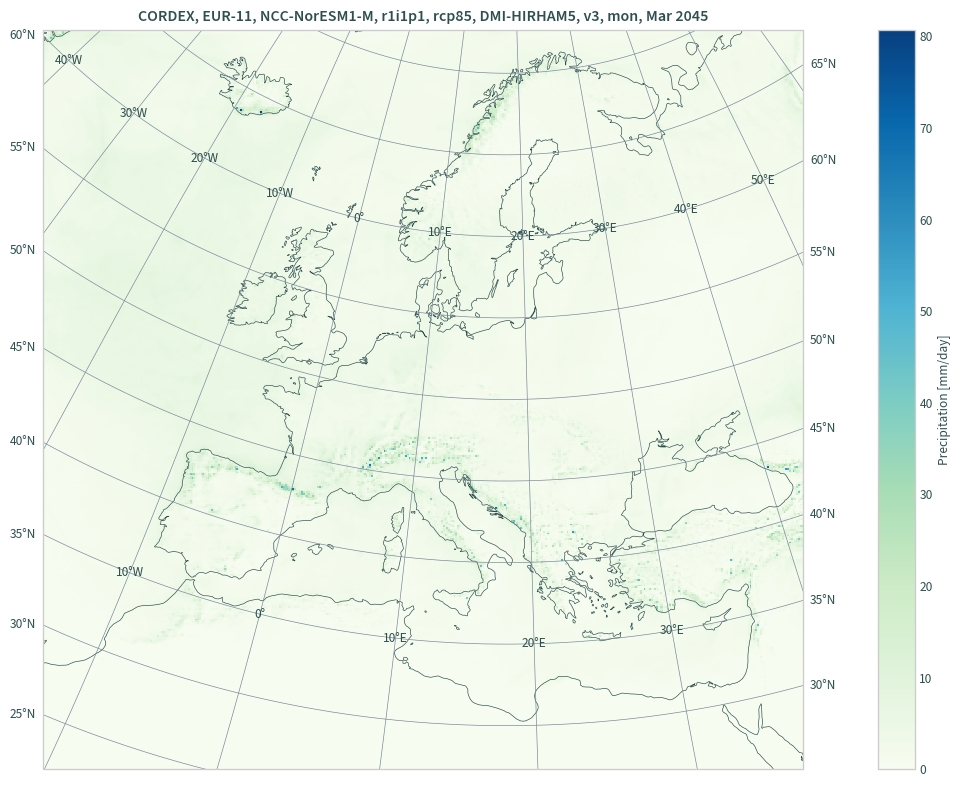

In [ ]:
plot_transform = cplt.rotated_pole_transform(data_50)
data_var = data_50[list(data_50.keys())[0]]  # extract variable name
plot_data = data_var * 60 * 60 * 24  # convert to mm/day
cbar_label = data_var.attrs["long_name"] + " [mm/day]"  # colorbar label

plt.figure(figsize=(20, 10))
ax = plt.axes(projection=plot_transform)

# specify gridline spacing and labels
ax.gridlines(
    draw_labels=True,
    xlocs=range(-180, 180, 10),
    ylocs=range(-90, 90, 5),
    color="lightslategrey",
    linewidth=.5
)

# plot data for the variable
plot_data.plot(
    ax=ax,
    cmap="GnBu",
    transform=plot_transform,
    x="rlon",
    y="rlat",
    cbar_kwargs=dict(label=cbar_label)
)

# add boundaries
ax.coastlines(resolution="50m", color="darkslategrey", linewidth=.5)

ax.set_title(cplt.cordex_plot_title(data_50))  # set plot title

plt.show()

In [26]:
data_ie = data_50.rio.clip(
    ie.envelope.buffer(10000).to_crs(data_50.rio.crs)
)

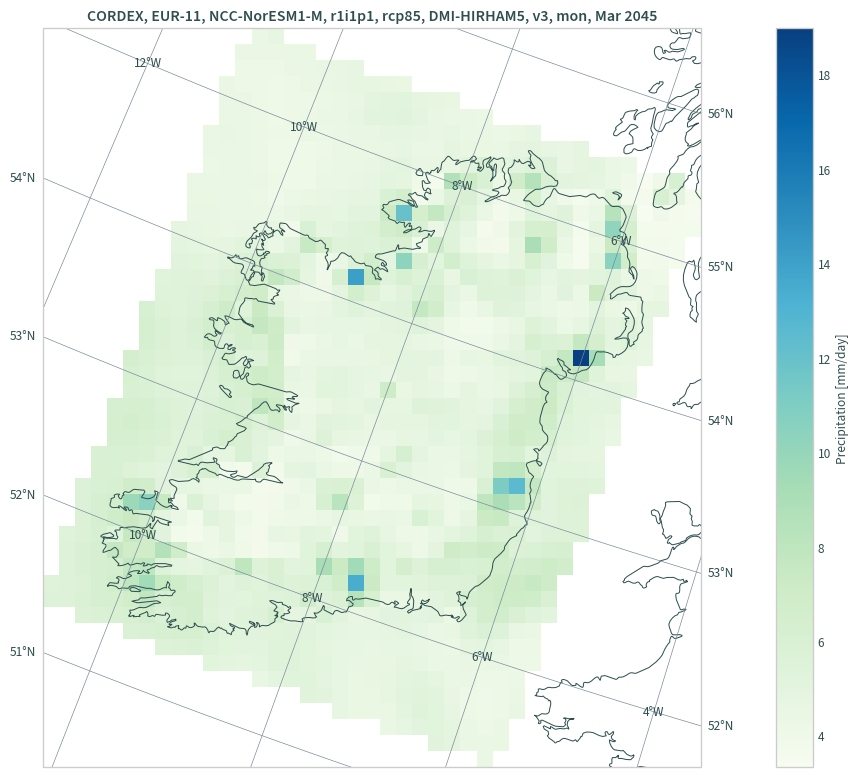

In [27]:
plot_transform = cplt.rotated_pole_transform(data_ie)
data_var = data_ie[list(data_ie.keys())[0]]  # extract variable name
plot_data = data_var * 60 * 60 * 24  # convert to mm/day
cbar_label = data_var.attrs["long_name"] + " [mm/day]"  # colorbar label

plt.figure(figsize=(20, 10))
ax = plt.axes(projection=plot_transform)

# specify gridline spacing and labels
ax.gridlines(
    draw_labels=True,
    xlocs=range(-180, 180, 2),
    ylocs=range(-90, 90, 1),
    color="lightslategrey",
    linewidth=.5
)

# plot data for the variable
plot_data.plot(
    ax=ax,
    cmap="GnBu",
    transform=plot_transform,
    x="rlon",
    y="rlat",
    cbar_kwargs=dict(label=cbar_label)
)

# add boundaries
ax.coastlines(resolution="10m", color="darkslategrey", linewidth=.75)

# Cork Airport marker
# plt.scatter(cds[0], cds[1], s=100, c="darkslategrey", marker="*")

ax.set_title(cplt.cordex_plot_title(data_ie))  # set plot title

plt.show()